In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
test = pd.read_csv("Testsales.csv")
train = pd.read_csv("train1.csv")

Number of train samples by label

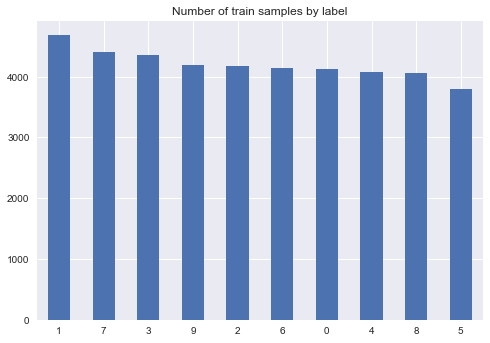

In [6]:
train.label.value_counts().plot.bar(rot=0,title='Number of train samples by label');

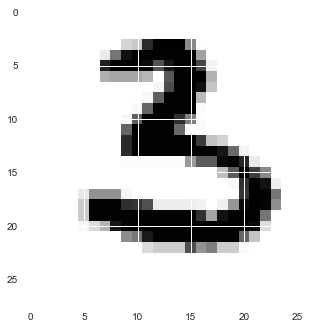

In [7]:
plt.imshow(train[train.columns[1:]].sample(1).values.ravel().reshape(28,28));

Train / Test data

In [8]:
from sklearn.model_selection import train_test_split
train_, test_ = train_test_split(train,test_size=0.33,random_state=42,stratify=train.label)

Check if the data it's fair splitted based on label

In [9]:
'train',train_.label.value_counts() / len(train_),'test',test_.label.value_counts() / len(test_)

('train',
 1    0.111514
 7    0.104797
 3    0.103589
 9    0.099716
 2    0.099467
 6    0.098507
 0    0.098365
 4    0.096944
 8    0.096731
 5    0.090370
 Name: label, dtype: float64,
 'test',
 1    0.111544
 7    0.104762
 3    0.103608
 9    0.099711
 2    0.099423
 6    0.098485
 0    0.098413
 4    0.096970
 8    0.096753
 5    0.090332
 Name: label, dtype: float64)

KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [11]:
%%time
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_[train_.columns[1:]],train_['label'])

CPU times: total: 46.9 ms
Wall time: 45.3 ms


KNeighborsClassifier(n_neighbors=3)

In [12]:
%%time
knn_results = test_.copy()
knn_results['y_pred'] = knn.predict(test_[test_.columns[1:]])

CPU times: total: 27.7 s
Wall time: 9.97 s


In [13]:
print(metrics.classification_report(knn_results.label,knn_results.y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1364
           1       0.95      1.00      0.97      1546
           2       0.98      0.96      0.97      1378
           3       0.96      0.95      0.96      1436
           4       0.96      0.96      0.96      1344
           5       0.95      0.94      0.95      1252
           6       0.98      0.99      0.98      1365
           7       0.96      0.97      0.96      1452
           8       0.98      0.91      0.94      1341
           9       0.95      0.95      0.95      1382

    accuracy                           0.96     13860
   macro avg       0.96      0.96      0.96     13860
weighted avg       0.96      0.96      0.96     13860



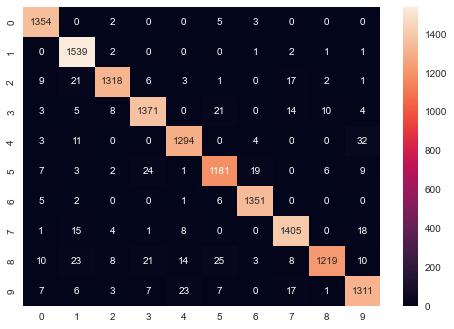

In [14]:
sns.heatmap(metrics.confusion_matrix(knn_results.label,knn_results.y_pred),annot=True,fmt='d');